# 4.05 Histograms, Binnings, and Density

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

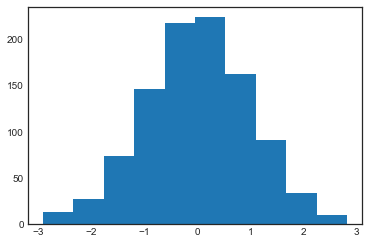

In [2]:
plt.hist(data);

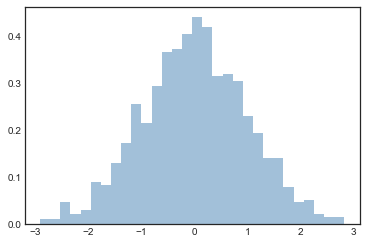

In [3]:
plt.hist(data, bins=30, normed=True, alpha=0.5,  # normed = True 归一化
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

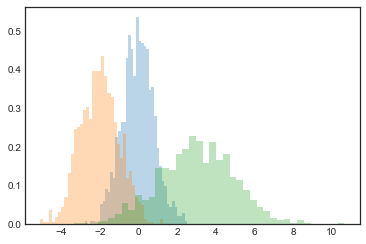

In [4]:

x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [6]:
# If you would like to simply compute the histogram
# (that is, count the number of points in a given bin) 
# and not display it, the np.histogram() function is available:

counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 40 220 442 254  44]
[-2.91824631 -1.77049489 -0.62274347  0.52500796  1.67275938  2.8205108 ]


## Two-Dimensional Histograms and Binnings

In [8]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

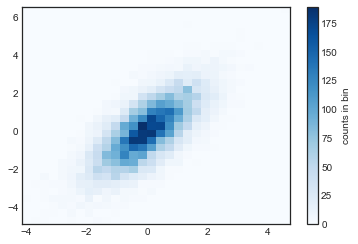

In [9]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [11]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

## plt.hexbin: Hexagonal binnings

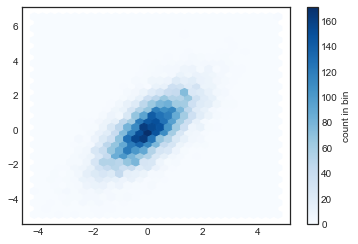

In [12]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## Kernel density estimation

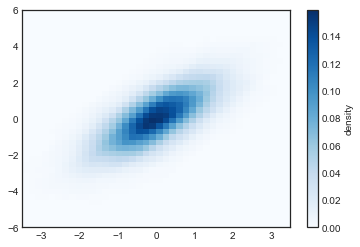

In [13]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")